<img style="max-width:20em; height:auto;" src="../graphics/A-Little-Book-on-Adversarial-AI-Cover.png"/>

Author: Nik Alleyne   
Author Blog: https://www.securitynik.com   
Author GitHub: github.com/securitynik   

Author Other Books: [   

            "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/",   
            
            "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/"   
        ]   


This notebook ***(activation_functions.ipynb)*** is part of the series of notebooks From ***A Little Book on Adversarial AI***  A free ebook released by Nik Alleyne

### Learning about activation functions

### Lab Objectives:   
- Understand the need for activation functions in neural networks   
- Understand the role activation functions play in neural networks        
- Implement and visualize some common activation functions  

### Step 1:  
Why the need for activation functions? Let us look at what would happen if we did not use activation functions   

In [1]:
# import some libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [2]:
### Version of key libraries used  
print(f'Numpy version used:  {np.__version__}')

Numpy version used:  2.1.3


In [3]:
# Instantiate the class
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=10,  cluster_std=2.)
X = MinMaxScaler(feature_range=(0,1)).fit_transform(X=X)

# Peak into the data
X[:5], y[:5]

(array([[0.54429202, 0.76764993],
        [0.42351652, 0.74908686],
        [0.65141345, 0.84866959],
        [0.820947  , 0.1958926 ],
        [0.34041805, 0.69733874]]),
 array([1, 1, 1, 0, 1]))

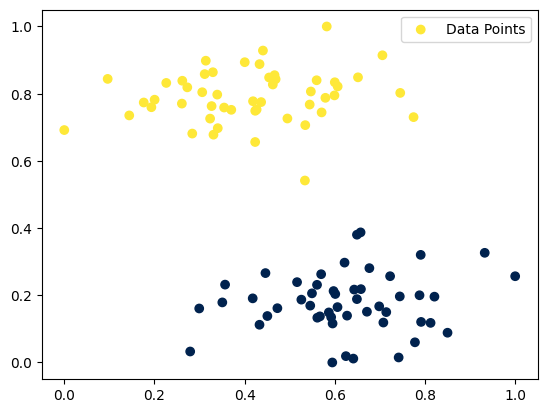

In [4]:
# Visualize the data
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='cividis', label='Data Points')
plt.legend()

In [5]:
# Setup an array of values to create a line
inputs = np.linspace(start=-5, stop=5, num=100)
inputs[:5]

array([-5.       , -4.8989899, -4.7979798, -4.6969697, -4.5959596])

In [6]:
# Let's assume we have the neural network with 1 input and 2 hidden layers and an output
weight_1 = 0.5
weight_2 = 0.2
weight_3 = 0.3
bias = 1.

# Define layer 1
layer_1 = inputs * weight_1 + bias

Let us assume the architecture of the model looks like this: 
<img style="max-width:30em; height:auto;"   src="../graphics/why_activation_functions_tf_playground.png"/>  
Source: tensorflow playground: https://playground.tensorflow.org/     

In this scenario, we have an input layer, two hidden layers and one output layer. Each of these layers have one neuron. The output layer is where our predictions will be made, hence the y_hat. 


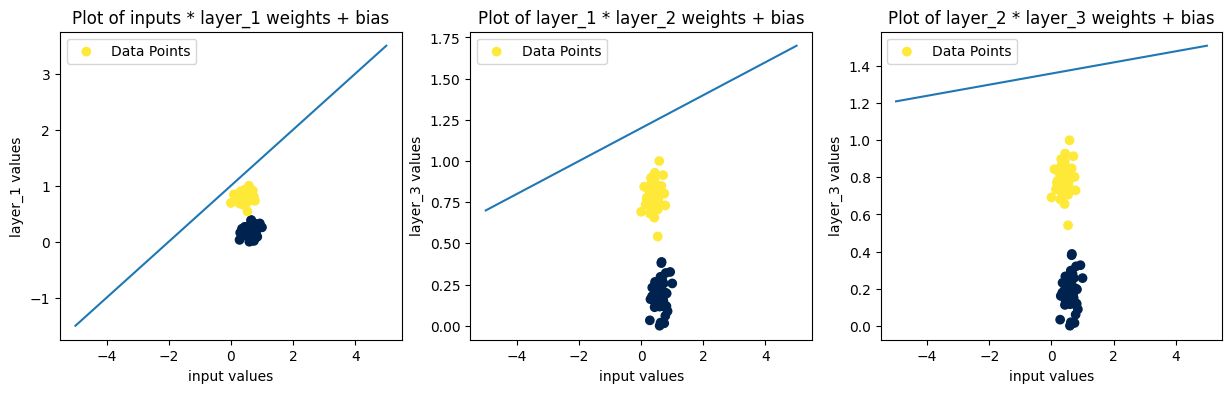

In [7]:
# Let's plot the first layer
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(131)
ax.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='cividis', label='Data Points')
ax.plot(inputs, layer_1)
ax.set_title('Plot of inputs * layer_1 weights + bias')
plt.xlabel('input values')
plt.ylabel('layer_1 values')
plt.legend()

# Let's now add layer 2. Layer 2 input, is the layer 1 output * w2 + bias
layer_2 = layer_1 * weight_2 + bias

ax = fig.add_subplot(132)
ax.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='cividis', label='Data Points')
ax.plot(inputs, layer_2)
ax.set_title('Plot of layer_1 * layer_2 weights + bias')
plt.xlabel('input values')
plt.ylabel('layer_3 values')
plt.legend()

# Wrap this up by adding the final layer
# This layer's input is the layer2 output 
layer_3 = layer_2 * weight_3 + bias

ax = fig.add_subplot(133)
ax.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='cividis', label='Data Points')
ax.plot(inputs, layer_3)
ax.set_title('Plot of layer_2 * layer_3 weights + bias')
plt.xlabel('input values')
plt.ylabel('layer_3 values')
plt.legend()

As we see above, it does not matter how many linear layers we provide, we always have a situation where the output is linear.  
Even if we add more layers, this line will always be straight.  

Let's see the role now that the activation function plays   

### Step 2:   
Create the Sigmoid activation function   

In [8]:
# define a sigmoid activation function
def sigmoid(x):
    return (1./(1. + np.exp(-x))).astype(float)

In [9]:
# Apply the activation function
# We see below, this is applied element wise on each item
np.set_printoptions(suppress=True)
sigmoid(inputs)[:5]

array([0.00669285, 0.00739896, 0.00817894, 0.00904041, 0.00999169])

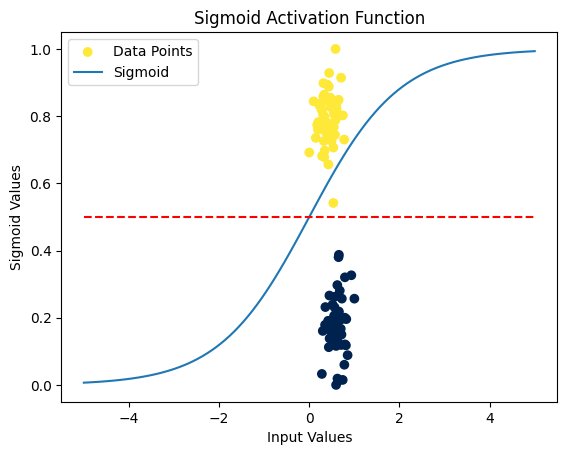

In [10]:
# Visualize the Sigmoid output
plt.title(label='Sigmoid Activation Function')
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='cividis', label='Data Points')
plt.plot(inputs, sigmoid(inputs), label='Sigmoid')
plt.hlines(y=.5,  xmin=inputs.min(), xmax=inputs.max(), colors='r', linestyles='--')
plt.xlabel('Input Values')
plt.ylabel('Sigmoid Values')
plt.legend();

Above shows that every value between -5 and 5 on the X axis, has now been squished to a value between 0 and 1 on the y axis. Because these values are squished to a value of 0 and 1, you will typically find he sigmoid as the last/output layer within neural networks that perform binary classification tasks. 

The output from the Sigmoid activation can be interpreted as probabilities. This means we can set a threshold for example at 0.5. Anything below this threshold is one class. Anything above the threshold is another class. You can specify any threshold that interests you and or your business needs.  


### Step 3:   
Create the Tanh activation function   

In [11]:
# Define Tanh activation function
def tanh(x):
    return ((np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))).astype(float)

In [12]:
# Apply the activation function
tanh(inputs)[:5]

array([-0.9999092 , -0.99988888, -0.999864  , -0.99983356, -0.9997963 ])

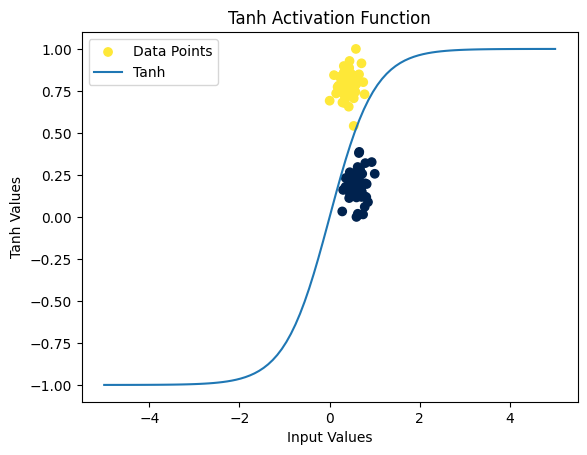

In [13]:
# Plot the tanh activation function
plt.title(label='Tanh Activation Function')
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='cividis', label='Data Points')
plt.plot(inputs, tanh(inputs), label='Tanh') 
plt.xlabel('Input Values')
plt.ylabel('Tanh Values')
plt.legend();

Above shows that every value between -5 and 5 on the X axis, has now been squished to a value between -1 and 1 on the y axis. The Tanh activation is not heavily used on the internals of a neural network today. However, you may see it at the last layer in solutions like Generative Adversarial Networks (GANS), where the generator outputs a value between -1 and +1.

You should also recognize, this is a scaled version of the Sigmoid activation function. 

considering above, Tanh is a scaled version of the sigmoid function     
   2σ(2x)−1     

let's say we have sigmoid function for the value 10      

Using the formula above     
sigmoid(10), 2*sigmoid(2*10)-1     

When we run the sigmoid and its scaled version we get:    
(np.float64(0.9999546021312976), np.float64(0.9999999958776926))      

Except for some floating point issues, these two values are basically the same up to 4 decimal points.  


### Step 4:   
Develop the ReLU Activation

In [14]:
# Relu Activation Function
def relu(x):
    ''' returns the relu value for x '''
    return np.maximum(0, x, dtype=np.float32)

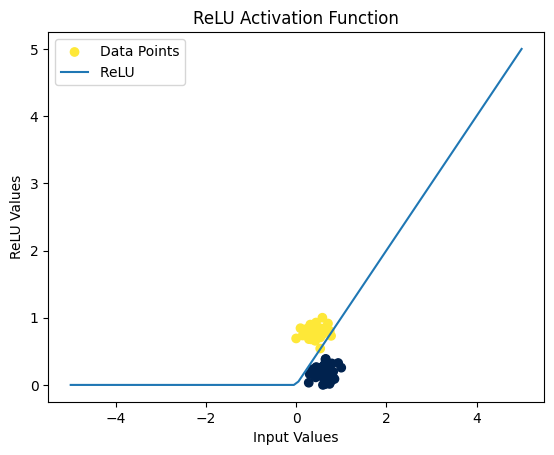

In [15]:
# Plot the Relu activation function
plt.title(label='ReLU Activation Function')
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='cividis', label='Data Points')
plt.plot(inputs, relu(inputs), label='ReLU ') 
plt.xlabel('Input Values')
plt.ylabel('ReLU Values')
plt.legend();

For the ReLU, all values less than 0 are capped at 0. This is why you see the flat line from -5 to 0. Every other value retains its magnitude 

### Step 5:   
Implement LeakyReLU   

In [16]:
# There are many variations of ReLU also, let's look at LeakyRelu
# As can be noticed, it provides a small epsilon value to multiply the input by
def leaky_relu(x):
    ''' returns the relu value for x '''
    return np.maximum(x*0.3, x, dtype=np.float32)

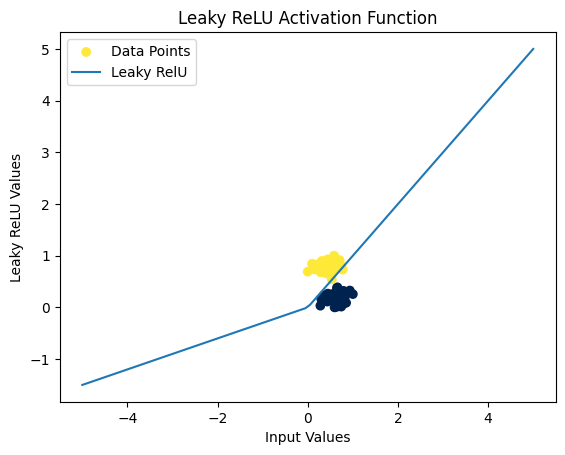

In [17]:
# Plot the Relu activation function
plt.title(label='Leaky ReLU Activation Function')
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='cividis', label='Data Points')
plt.plot(inputs, leaky_relu(inputs), label='Leaky RelU') 
plt.xlabel('Input Values')
plt.ylabel('Leaky ReLU Values')
plt.legend();

### Step 5:   
Implement Exponential Linear Unit (ELU) Activation Function   

In [18]:
# Define the ElU function
def elu(x, alpha=1.0):
    return np.where(x > 0, x, (alpha * np.exp(x) - 1))

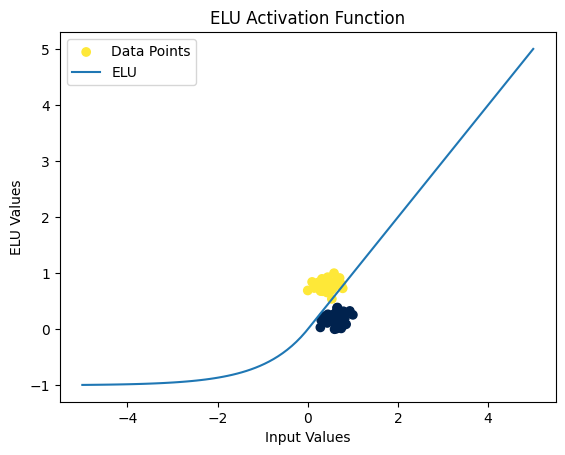

In [19]:
# Plot the Relu activation function
plt.title(label='ELU Activation Function')
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='cividis', label='Data Points')
plt.plot(inputs, elu(inputs), label='ELU') 
plt.xlabel('Input Values')
plt.ylabel('ELU Values')
plt.legend();

### Step 6:   
Implement Scaled Exponential Linear Unit (SELU) Activation Function   

In [20]:
# Define the SElU function
def selu(x, alpha=1.67326, scale=1.0507):
    return scale * np.where(x > 0, x, (alpha * np.exp(x) - 1))

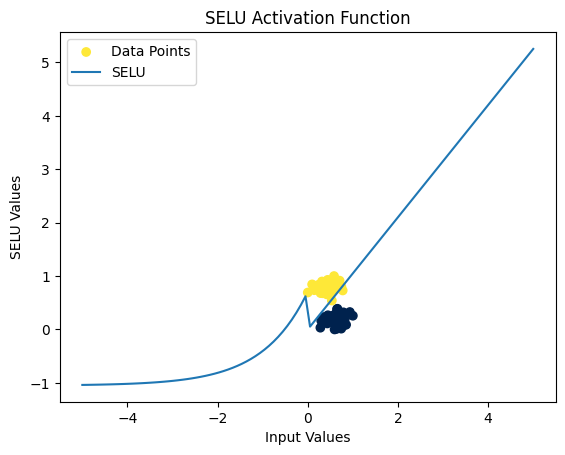

In [21]:
# Plot the Relu activation function
plt.title(label='SELU Activation Function')
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='cividis', label='Data Points')
plt.plot(inputs, selu(inputs), label='SELU') 
plt.xlabel('Input Values')
plt.ylabel('SELU Values')
plt.legend();

### Step 7:   
Develop the SWISH Activation  

In [22]:
# There is also SWISH
def swish(x):
    ''' Swish Activation Function '''
    return x * sigmoid(x)

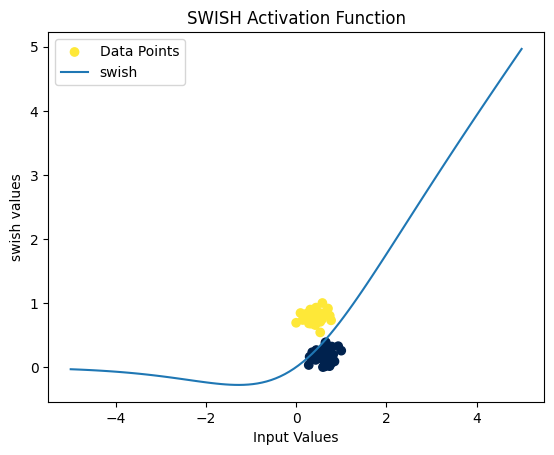

In [23]:
# Plot the Relu activation function
plt.title(label='SWISH Activation Function')
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='cividis', label='Data Points')
plt.plot(inputs, swish(inputs), label='swish') 
plt.xlabel('Input Values')
plt.ylabel('swish values')
plt.legend();

All of the activation functions defined above, with the exception of Sigmoid, are typically used on the inner layers of the neural networks. Sigmoid activation function is typically used in the last layer of the neural network when we are solving binary classification problems such as predicting if a sample is suspicious or not.   

Softmax like Sigmoid is generally used in the last layer of the neural network. However, Softmax is typically used when we have more than two classes. There is nothing that says we cannot use it with two classes. However, generally for two classes we use binary classification with Sigmoid. With multiclass we use Softmax.   


### Step 7:   
Develop the Softmax Activation  

In [24]:
# Create three labels to represent a multiclass problem
labels = ['normal', 'suspicious', 'unknown']
labels

['normal', 'suspicious', 'unknown']

In [25]:
# Create some random data to represent the logits. 
# The logits are the raw unscaled output from the last layer of the neural network.
# Put it a different way, the logits are the output of the network for which no activation function has been applied
# Let's assume we would like to predict one of the three classes above
# Create some random data to represent the output of the network
np.random.seed(6)
logits= np.random.normal(size=(3,))
logits

array([-0.31178367,  0.72900392,  0.21782079])

In [26]:
# Define the Softmax Activation Function
def softmax(x): 
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

When the the logits (or any input) is passed through the softmax activation function, it creates a probability distribution that equals to 1. In our case above, we have three items in the vector. When these are passed through the softmax, we get a vector with three different probabilities, each representing the likelihood of a sample being in class 0, 1 or 2, which is associated with is associated with 'normal', 'suspicious', and 'unknown' respectively.

In [27]:
# Apply the softmax function to the logits
softmax(logits)

array([0.18084142, 0.51204275, 0.30711583])

In [28]:
# On a side note, we could then extract the max value of the logits
softmax(logits).argmax().item()

1

In [29]:
# We can now index into our labels and pull out the class that represents the highest logits
labels[softmax(logits).argmax().item()]

'suspicious'

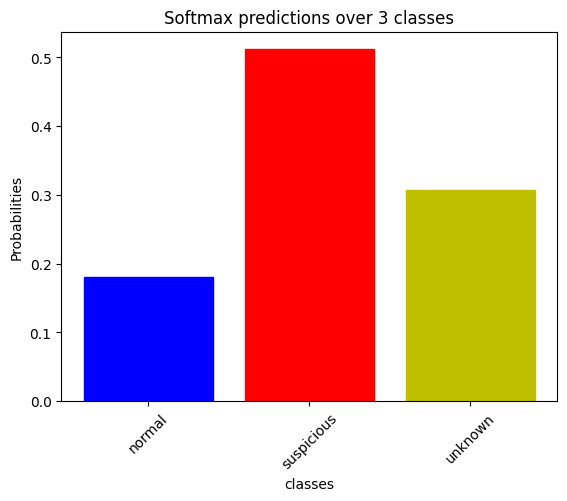

In [30]:
# We can then visualize the softmax results   
# Pass these values through the activation function and graph them
plt.title(label='Softmax predictions over 3 classes')
bar_plot = plt.bar(x=labels, height=softmax(logits))
bar_plot[0].set_color('b')
bar_plot[1].set_color('r')
bar_plot[2].set_color('y')

plt.xlabel(xlabel='classes')
plt.ylabel(ylabel='Probabilities')
plt.xticks(ticks=labels, labels=labels, rotation=45);

That is is it for activation function. There are other activation functions out there and there are always effort to introduce new ones. For the problem we are trying to solve, these are generally the ones you will see more often. However, feel free to experiment with others.   


### Lab Takeaways:   
- We were able to learn about some common activations  
- We learned about which activation functions are typically seen in the last layer of the neural network   
- We learned which activation are typically used on the internal layers of the network   
- We learned about how to take the logits of th elast layer, convert them to probabilities   
- We learnt how to find the index of the largest probability and map it back to the original labels      


Additional References:   
https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html    
https://cs231n.github.io/neural-networks-1/     
https://neuralthreads.medium.com/selu-and-elu-exponential-linear-units-a826d5eeb99c    
https://closeheat.com/blog/elu-activation-function   